# MS 266:Final Project Draft

### <ins>INTRODUCTION</ins>

Elkhorn Slough is a unique Central California estuary, exhibiting large scale seasonal variability as both a classical estuary in the winter and an inverse estuary in the summer (Nidzieko and Monismith 2013). The introduction of seawater after Elkhorn Slough was dredged in 1946 transformed the Slough from a closed freshwater ecosystem to a salty estuary (W. Broenkow and C. Breaker 2020). Estuaries like Elkhorn Slough offer an attractive setting for researchers because of the multiple habitats and ecotones within a system created by multiple physicochemical, biological, physical, and anthropogenic gradients (McLusky and Elliott 2004). 

Efforts to monitor the water quality of Elkhorn Slough systematically have been underway for 20+ years under the NOAA funded System-Wide Monitoring Program (SWMP). The goal of this program is to monitor Elkhorn Slough’s water quality and anthropogenic disturbance. The SWMP provides some information on the productivity of an ecosystem through nutrient analysis and chlorophyll a data. A suite of water quality parameters are routinely measured, including ammonium (NH4), dissolved oxygen (DO), pH, salinity, nitrate (NO3), nitrite (NO2), phosphate (PO4), turbidity, algal cover, and chlorophyll a. 	 
    
The long-term monitoring effort of the SWMP has maintained a consistent sampling protocol since 1988 which provides a solid foundation for understanding seasonal and spatial changes in an estuarine ecosystem, including improvements to water quality due to restoration efforts (Wasson et al. 2015; Hicks 2019). Exploring this dataset highlights the extreme fluctuations in physicochemical parameters, evident at various sites within Elkhorn Slough and surrounding wetlands (Hicks 2019)**(Figure 1)**. The goal of this paper is to analyze this long-term dataset from SWMP to compare sites/regions to find trends in the data.


### <ins>METHODS</ins>

1. Create Map
2. Load data
3. ESNERR RAW DATA
4. Create PCA
5. Subset Data 2015-2020

### 1. Load data

In [1]:
#Important for plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#For PCA
from scipy import linalg

#For mapping
import xarray as xr
import cartopy.crs as ccrs
import cmocean.cm as cmo
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
from cartopy.io import shapereader

In [2]:
def dataconverter(file):
    """
    Places file into a dataframe

    Parameters
    ----------
    file : *.csv
    Return
    ------
    df : array
        .csv file in a data frame
    """
    filename = file
    df = pd.read_csv(file, na_values=-999)
    return(df)

In [3]:
#ESNERR Data
df = dataconverter('ESNERR_DATA_25.csv')

#Map data
df_site = dataconverter('SITE.csv')
shp_file = 'Elkhorn_Slough_GIS/WETLAND/wetland.shp'
wetland = shapereader.Reader(shp_file)

### 2. Create Map

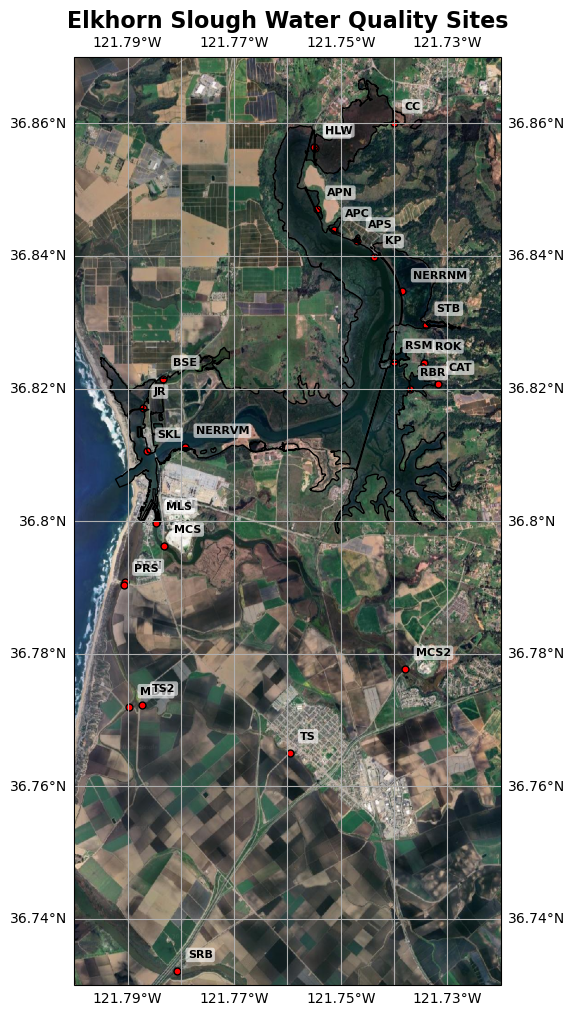

In [4]:
request = cimgt.GoogleTiles(style='satellite')

plt.figure(figsize=(6, 10))
ax = plt.axes(projection=ccrs.Mercator())

ax.add_image(request, 14)

for geometry in wetland.geometries():
    ax.add_geometries(geometry, ccrs.UTM (zone=10), facecolor='none', edgecolor='black')

site_lats = df_site['AvgOfDD_LAT'].values
site_lons = df_site['AvgOfDD_LONG'].values
site_names = df_site['SITE'].values

ax.scatter(site_lons, site_lats, color='red', s=25, edgecolors='black', transform=ccrs.PlateCarree())

for lon, lat, name in zip(site_lons, site_lats, site_names):
    ax.text(lon + 0.002, lat + 0.002, name, transform=ccrs.PlateCarree(),fontsize=8,fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'))
    
ax.set_extent([-121.8,-121.72, 36.73, 36.87], crs=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

plt.tight_layout()

plt.title("Elkhorn Slough Water Quality Sites", fontsize=16, fontweight='bold');

#plt.savefig("ES_MAP", bbox_inches='tight', dpi=300)

**Figure 1:** The ~30 sampling sites (red) of Elkhorn Slough with site codes.

In [5]:
df#See which site correspondes with which region

,ESNERR_StCode,Region,Date,AvgOfTime,AvgOfDD_LAT,AvgOfDD_LONG,Temp C,Sal (PSU),AvgOfpH,DO SAT %,...,Umol Ammonia,Nitrate as N (mg/L),Umol Nitrate,Nitrite as N (mg/L),MLML Nitrate mg/L,MCCL Phosphate (mg/L),Umol Phosphate,total Nitrogen,Free Ammonia (mg/L),Lab Chl a (ug/L)
0,BSE,Lower Slough,9/22/1989,0.41,36.821500,-121.783400,19.30,21.20,8.99,NaN,...,86.67,0.03,2.12,0.00,NaN,0.50,16.11,NaN,0.33,0.00
1,BSW,Lower Slough,9/22/1989,0.39,36.820900,-121.790900,18.70,32.00,8.33,NaN,...,2.30,0.01,0.68,0.00,NaN,0.17,5.42,NaN,0.00,0.00
2,JR,Lower Slough,9/22/1989,0.38,36.817100,-121.787100,18.80,31.30,8.29,NaN,...,6.45,0.02,1.22,0.00,NaN,0.11,3.54,NaN,0.01,0.00
3,MCS,Lower Slough,9/22/1989,0.49,36.796300,-121.783200,22.50,38.00,9.28,NaN,...,2.63,0.09,6.30,0.00,NaN,0.09,3.06,NaN,0.02,0.00
4,SKL,Lower Slough,9/22/1989,0.36,36.810600,-121.786400,15.50,31.50,8.14,NaN,...,2.92,0.05,3.89,0.00,NaN,0.01,0.41,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093,SKL,Lower Slough,6/13/2023,0.39,36.810600,-121.786400,15.23,31.13,7.68,93.80,...,6.50,NaN,NaN,0.01,0.20,0.02,0.77,0.29,0.00,5.31
9094,SRB,Salinas River,6/13/2023,0.43,36.732100,-121.780700,19.67,27.73,7.60,59.20,...,1.93,NaN,NaN,0.13,5.71,0.14,4.42,5.74,0.00,24.69
9095,STB,Reserve,6/13/2023,0.36,36.829600,-121.734000,18.64,32.24,8.08,50.13,...,1.43,NaN,NaN,0.01,0.00,0.03,0.87,0.02,0.00,14.14
9096,TS,Tembladero Slough,6/13/2023,0.45,36.765100,-121.759600,17.98,1.09,8.25,77.00,...,2.50,NaN,NaN,0.48,41.38,0.28,8.88,41.41,0.00,125.69


### 3. ESNERR DATA

In [6]:
df.columns #Check my data columns

Index(['ESNERR_StCode', 'Region', 'Date', 'AvgOfTime', 'AvgOfDD_LAT',
       'AvgOfDD_LONG', 'Temp C', 'Sal (PSU)', 'AvgOfpH', 'DO SAT %', 'DO mg/L',
       'Turb (NTU)', 'Chl (ug/L)', 'Floating Algae % Cover',
       'Ammonia as N mg/L', 'Umol Ammonia', 'Nitrate as N (mg/L)',
       'Umol Nitrate', 'Nitrite as N (mg/L)', 'MLML Nitrate mg/L',
       'MCCL Phosphate (mg/L)', 'Umol Phosphate', 'total Nitrogen',
       'Free Ammonia (mg/L)', 'Lab Chl a (ug/L)'],
      dtype='object')

In [7]:
df.dtypes

ESNERR_StCode              object
Region                     object
Date                       object
AvgOfTime                 float64
AvgOfDD_LAT               float64
AvgOfDD_LONG              float64
Temp C                    float64
Sal (PSU)                 float64
AvgOfpH                   float64
DO SAT %                   object
DO mg/L                   float64
Turb (NTU)                 object
Chl (ug/L)                float64
Floating Algae % Cover    float64
Ammonia as N mg/L         float64
Umol Ammonia               object
Nitrate as N (mg/L)        object
Umol Nitrate               object
Nitrite as N (mg/L)       float64
MLML Nitrate mg/L          object
MCCL Phosphate (mg/L)      object
Umol Phosphate             object
total Nitrogen             object
Free Ammonia (mg/L)       float64
Lab Chl a (ug/L)           object
dtype: object

In [8]:
def data_cleaner (dataframe):
    """
    Converts data frame into float and adds NaN value to blank cells

    Parameters
    ----------
    dataframe : object, float, or numpy array
        Data frame as an object or missing values
    Return
    ------
    cleaned : float
        Data frame as a float with NaN values added
    """
    cleaned = pd.to_numeric(dataframe, errors='coerce')
    return(cleaned)

In [9]:
#Convert data to float and add NaN values
df['Lab Chl a (ug/L)'] = data_cleaner(df['Lab Chl a (ug/L)'])
df['Turb (NTU)'] = data_cleaner(df['Turb (NTU)'])
df['MCCL Phosphate (mg/L)'] = data_cleaner(df['MCCL Phosphate (mg/L)'])
df['MLML Nitrate mg/L'] = data_cleaner(df['MLML Nitrate mg/L'])

In [10]:
#Fix dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [11]:
df.dtypes

ESNERR_StCode                     object
Region                            object
Date                      datetime64[ns]
AvgOfTime                        float64
AvgOfDD_LAT                      float64
AvgOfDD_LONG                     float64
Temp C                           float64
Sal (PSU)                        float64
AvgOfpH                          float64
DO SAT %                          object
DO mg/L                          float64
Turb (NTU)                       float64
Chl (ug/L)                       float64
Floating Algae % Cover           float64
Ammonia as N mg/L                float64
Umol Ammonia                      object
Nitrate as N (mg/L)               object
Umol Nitrate                      object
Nitrite as N (mg/L)              float64
MLML Nitrate mg/L                float64
MCCL Phosphate (mg/L)            float64
Umol Phosphate                    object
total Nitrogen                    object
Free Ammonia (mg/L)              float64
Lab Chl a (ug/L)

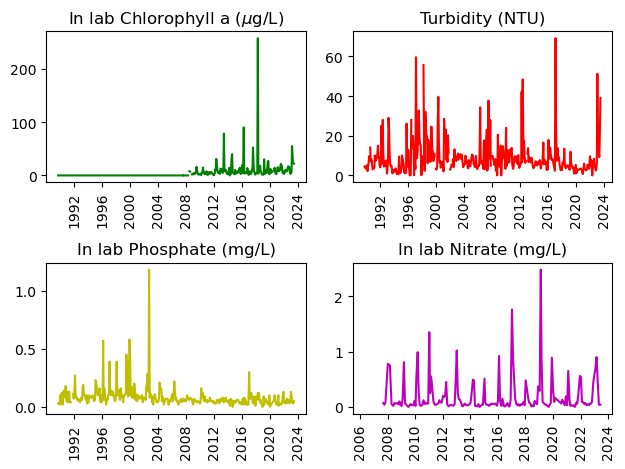

In [12]:
plt.figure()

plt.subplot(2,2,1)
plt.plot(df[df['ESNERR_StCode'] == 'KP']['Date'], df[df['ESNERR_StCode'] == 'KP']['Lab Chl a (ug/L)'], 'g-')
plt.xticks(rotation=90)
plt.title('In lab Chlorophyll a ($\\mu$g/L)')

plt.subplot(2,2,2)
plt.plot(df[df['ESNERR_StCode'] == 'KP']['Date'], df[df['ESNERR_StCode'] == 'KP']['Turb (NTU)'], 'r-')
plt.xticks(rotation=90) 
plt.title('Turbidity (NTU)')

plt.subplot(2,2,3)
plt.plot(df[df['ESNERR_StCode'] == 'KP']['Date'], df[df['ESNERR_StCode'] == 'KP']['MCCL Phosphate (mg/L)'], 'y-')
plt.xticks(rotation=90) 
plt.title('In lab Phosphate (mg/L)')

plt.subplot(2,2,4)
plt.plot(df[df['ESNERR_StCode'] == 'KP']['Date'], df[df['ESNERR_StCode'] == 'KP']['MLML Nitrate mg/L'], 'm-')
plt.xticks(rotation=90) 
plt.title('In lab Nitrate (mg/L)')

plt.tight_layout()
#plt.savefig("ES_raw", bbox_inches='tight', dpi=300)
plt.show();

**Figure 2:** Chlrophyll *a* [ug/L] (green), turbidity [NTU] (red), phosphate [mg/L] (yellow), and nitrate [mg/L] (purple) of Kirby Park (KP) in Elkhorn Slough, CA. Data ranges from 1989-2023 with the exception of nitrate which starts in 2008.

### 4. Create a PCA

In [13]:
all_sites = df['ESNERR_StCode'].unique()
all_sites.shape

(31,)

In [14]:
all_sites # Too many on PCA will use regions instead

array(['BSE', 'BSW', 'JR', 'MCS', 'SKL', 'SRB', 'SRL', 'CC', 'HLE', 'HLW',
       'KP', 'PRN', 'PRS', 'RBR', 'RNM', 'RSM', 'SP', 'MLN', 'MLS', 'MDW',
       'APC', 'APN', 'APS', 'TS', 'STB', 'NERRNM', 'NERRVM', 'CAT', 'ROK',
       'MCS2', 'TS2'], dtype=object)

In [15]:
regions = df['Region'].unique()

#### 4A. Turbidity PCA

In [16]:
df['Turb (NTU)'].shape

(9098,)

In [17]:
df = df.dropna(subset=['Turb (NTU)'])
df['Turb (NTU)'].shape # Check to make sure NaN values removed

(8797,)

In [18]:
np.isnan(df['Turb (NTU)']).sum() #Check number of NaN values

np.int64(0)

In [19]:
k = len(regions)
N = len(df['Date'])
X = np.ones([N, k+1])
print(np.shape(X))

(8797, 7)


In [20]:
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(8797, 7))

In [21]:
regions

array(['Lower Slough', 'Salinas River', 'Upper Slough',
       'Tembladero Slough', 'Reserve', 'Freshwater Pond'], dtype=object)

In [22]:
df_sub = {}
for site in regions:
    df_sub[site]= df[df['Region'] == site]

In [23]:
X_turb = X # Save X so you can make another matrice for phosphate
for i, site in enumerate(regions):
    values = df_sub[site]['Turb (NTU)'].values 
    X_turb[:len(values), i] = values

In [24]:
X_turb

array([[11.  , 11.5 ,  4.75, ...,  6.  , 36.9 ,  1.  ],
       [ 4.5 ,  9.  ,  4.  , ..., 14.25,  3.43,  1.  ],
       [ 3.  , 18.  ,  4.5 , ...,  4.8 , 29.18,  1.  ],
       ...,
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ]], shape=(8797, 7))

In [25]:
df_sub['Lower Slough']['Turb (NTU)'] #Check to see if matrice is in order for region/site

0       11.00
1        4.50
2        3.00
3        6.00
4        2.00
        ...  
9082     6.77
9084     7.38
9085     6.74
9087     4.20
9093     5.55
Name: Turb (NTU), Length: 2957, dtype: float64

In [26]:
X_turb = X_turb[:,:-1]
np.shape(X_turb)# remove 1s

(8797, 6)

In [27]:
X_turb_z = (X_turb - np.mean(X_turb, axis=0)) / np.std(X_turb, axis=0, ddof=1) #zscore

In [28]:
X_turb_z

array([[ 0.03520643,  0.36033716, -0.10698872, -0.19071945,  0.16367886,
         2.47634428],
       [-0.14311394,  0.25241314, -0.12822717, -0.15125166,  0.6495623 ,
         0.08930767],
       [-0.18426479,  0.64093961, -0.1140682 , -0.24202757,  0.0930049 ,
         1.92576398],
       ...,
       [-0.2391326 , -0.09294372, -0.21318095, -0.26570824, -0.13079596,
        -0.08399675],
       [-0.2391326 , -0.09294372, -0.21318095, -0.26570824, -0.13079596,
        -0.08399675],
       [-0.2391326 , -0.09294372, -0.21318095, -0.26570824, -0.13079596,
        -0.08399675]], shape=(8797, 6))

In [29]:
R_turb = np.cov(X_turb_z, rowvar = False) #Using correlation matrix because variables different unit
np.shape(R_turb)

(6, 6)

In [30]:
#R_sal #Too long put # to make notebook shorter

In [31]:
#Calculate eigen values
val, vec = linalg.eig(R_turb)
val = np.real(val)
print(val) #eigen values

[1.38691677 1.12117324 0.77879181 0.95795875 0.90477851 0.85038092]


In [32]:
#Sort values and vectors
idx = np.argsort(val)[::-1]   
sort_values = val[idx]
sort_vector = vec[:,idx]
print(sort_values)

[1.38691677 1.12117324 0.95795875 0.90477851 0.85038092 0.77879181]


In [33]:
#sort regions
sorted_sites = regions[idx]
print(sorted_sites)

['Lower Slough' 'Salinas River' 'Tembladero Slough' 'Reserve'
 'Freshwater Pond' 'Upper Slough']


In [34]:
percent_variance = 100*val/np.sum(val)
print(percent_variance[0:2]) 

[23.11527955 18.68622071]


In [35]:
Lambda = np.diag(val)
#print(Lambda)

In [36]:
A = np.dot(vec, Lambda**0.5)
#print(A)

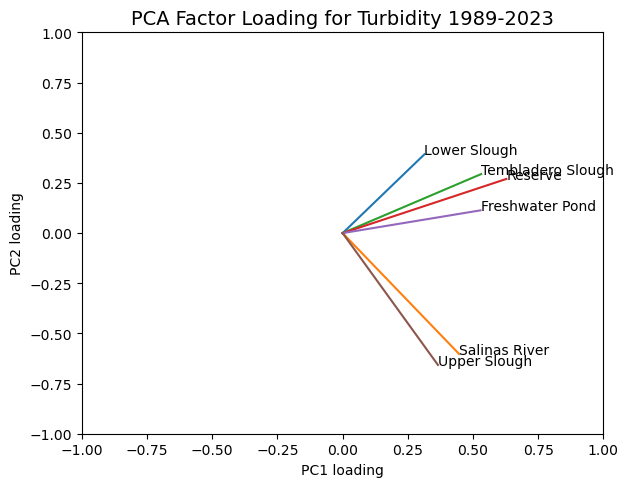

In [37]:
plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

for i,txt in enumerate(sorted_sites):
    plt.plot([0,A[i,0]],[0,A[i,1]],'-')
    plt.text(A[i,0],A[i,1],txt)

plt.tight_layout()
plt.title("PCA Factor Loading for Turbidity 1989-2023", fontsize=14)
#plt.savefig("PCA_turb2", bbox_inches='tight', dpi=300)
plt.show()

**Figure 3:** PCA factor loading of each region based off turbidity data from 1989-2023.

In [38]:
PCA_score = X_turb_z@vec

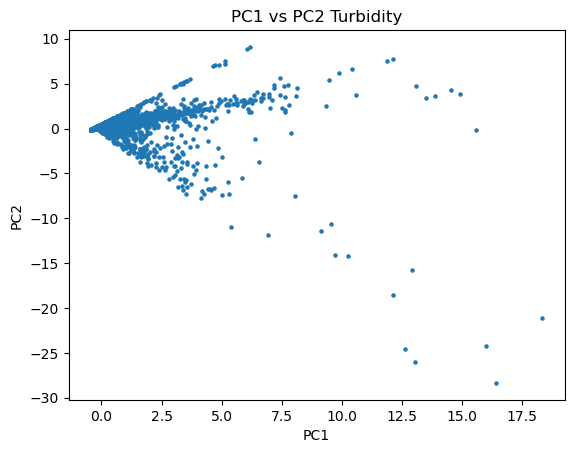

In [39]:
plt.figure()
plt.scatter(PCA_score[:,0], PCA_score[:,1], s =5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 Turbidity')
#plt.savefig("PC1&2_turb", bbox_inches='tight', dpi=300)
plt.show()

**Figure 4:** PCA scores of each region based off turbidity data from 1989-2023.

Repeat with phosphate: Cant do nitrate or chlorophyll (too many missing data)

#### 4B. Salinity PCA

In [40]:
df = df.dropna(subset=['MCCL Phosphate (mg/L)'])
df['MCCL Phosphate (mg/L)']

0       0.50
1       0.17
2       0.11
3       0.09
4       0.01
        ... 
9093    0.02
9094    0.14
9095    0.03
9096    0.28
9097    0.47
Name: MCCL Phosphate (mg/L), Length: 8673, dtype: float64

In [41]:
np.isnan(df['MCCL Phosphate (mg/L)']).sum()

np.int64(0)

In [42]:
df_sub = {}
for site in regions:
    df_sub[site]= df[df['Region'] == site]

In [43]:
X_pho = X # Save X so you can make another matrice for phosphate
for i, site in enumerate(regions):
    values = df_sub[site]['MCCL Phosphate (mg/L)'].values 
    X_pho[:len(values), i] = values

In [44]:
X_pho

array([[0.5 , 0.02, 0.09, ..., 0.04, 0.08, 1.  ],
       [0.17, 0.06, 0.11, ..., 0.03, 0.44, 1.  ],
       [0.11, 0.18, 0.07, ..., 0.03, 0.09, 1.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]], shape=(8797, 7))

In [45]:
X_pho = X_pho[:,:-1]
np.shape(X_pho)# remove 1s
X_pho_z = (X_pho - np.mean(X_pho, axis=0)) / np.std(X_pho, axis=0, ddof=1) 
R_pho = np.cov(X_pho_z, rowvar = False) #Using correlation matrix because variables different unit
np.shape(R_pho)

(6, 6)

In [46]:
np.isnan(X_pho).sum()

np.int64(0)

In [47]:
val, vec = linalg.eig(R_pho)
val = np.real(val)
print(val)

[1.04191253 0.95945717 0.99363154 0.99678282 1.00561073 1.00260521]


In [48]:
idx = np.argsort(val)[::-1]   
sort_values = val[idx]
sort_vector = vec[:,idx]
print(sort_values)

[1.04191253 1.00561073 1.00260521 0.99678282 0.99363154 0.95945717]


In [49]:
#sort regions
sorted_sites = regions[idx]
print(sorted_sites)

['Lower Slough' 'Reserve' 'Freshwater Pond' 'Tembladero Slough'
 'Upper Slough' 'Salinas River']


In [50]:
percent_variance = 100*val/np.sum(val)
print(percent_variance[0:2]) 

[17.36520883 15.99095276]


In [51]:
sum(percent_variance[0:2])

np.float64(33.3561615935886)

In [52]:
Lambda = np.diag(val)
A = np.dot(vec, Lambda**0.5)

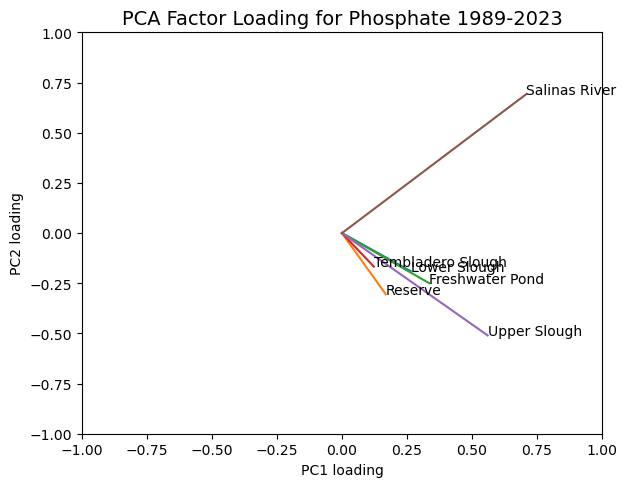

In [53]:
plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

for i,txt in enumerate(sorted_sites):
    plt.plot([0,A[i,0]],[0,A[i,1]],'-')
    plt.text(A[i,0],A[i,1],txt)

plt.tight_layout()
plt.title("PCA Factor Loading for Phosphate 1989-2023", fontsize=14)
#plt.savefig("PCA_turb2", bbox_inches='tight', dpi=300)
plt.show()

**Figure 5** PCA factor loading of each region based off phosphate data from 1989-2023.

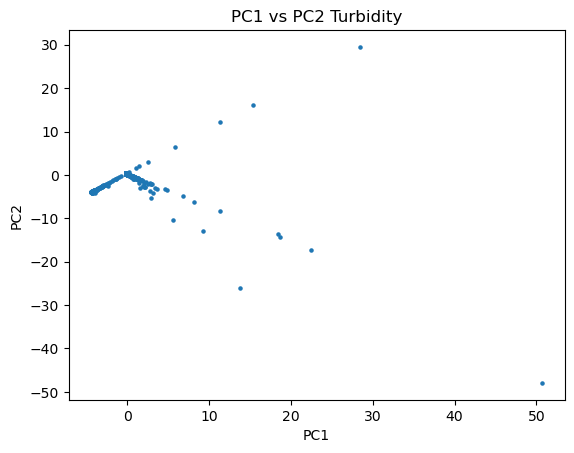

In [54]:
PCA_score = X_pho_z@vec
plt.figure()
plt.scatter(PCA_score[:,0], PCA_score[:,1], s =5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 Turbidity')
#plt.savefig("PC1&2_turb", bbox_inches='tight', dpi=300)
plt.show()

**Figure 6:** PCA scores of each region based off phosphate data from 1989-2023.

### 5. Subset Data 2015-2020
* Due to nature of data (chlorophyll and nitrate were not measured until 2008) create a subset from 2015-2020 (during El nino)
* Also for outdated methods.
* See the average for each site (redo code) vs turbidity, chlorophyll, nitrate, and phosphate.
* Compare site directly outside Salina River (flows into Slough) like MCS and measure patterns.
* Look at impact of eutrophication

In [55]:
#Find data range
Data_range = (df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2020)
df_range = df[Data_range]

In [56]:
df_range.columns

Index(['ESNERR_StCode', 'Region', 'Date', 'AvgOfTime', 'AvgOfDD_LAT',
       'AvgOfDD_LONG', 'Temp C', 'Sal (PSU)', 'AvgOfpH', 'DO SAT %', 'DO mg/L',
       'Turb (NTU)', 'Chl (ug/L)', 'Floating Algae % Cover',
       'Ammonia as N mg/L', 'Umol Ammonia', 'Nitrate as N (mg/L)',
       'Umol Nitrate', 'Nitrite as N (mg/L)', 'MLML Nitrate mg/L',
       'MCCL Phosphate (mg/L)', 'Umol Phosphate', 'total Nitrogen',
       'Free Ammonia (mg/L)', 'Lab Chl a (ug/L)'],
      dtype='object')

In [57]:
df_range['ESNERR_StCode'].unique()

array(['APC', 'APN', 'APS', 'BSE', 'CAT', 'CC', 'HLE', 'HLW', 'JR', 'KP',
       'MCS', 'MDW', 'MLN', 'MLS', 'PRN', 'PRS', 'RBR', 'RSM', 'SKL',
       'SP', 'SRB', 'STB', 'TS', 'TS2', 'MCS2', 'NERRNM', 'NERRVM', 'ROK'],
      dtype=object)

In [58]:
mean_nitrate = df_range['MLML Nitrate mg/L'].mean()
mean_chl = df_range['Lab Chl a (ug/L)'].mean()
mean_phos = df_range['MCCL Phosphate (mg/L)'].mean()
mean_turbidity = df_range['Turb (NTU)'].mean()

In [59]:
std_turbidity = df_range['Turb (NTU)'].std()
std_nitrate = df_range['MLML Nitrate mg/L'].std()
std_phos = df_range['MCCL Phosphate (mg/L)'].std()
std_chl = df_range['Lab Chl a (ug/L)'].std()

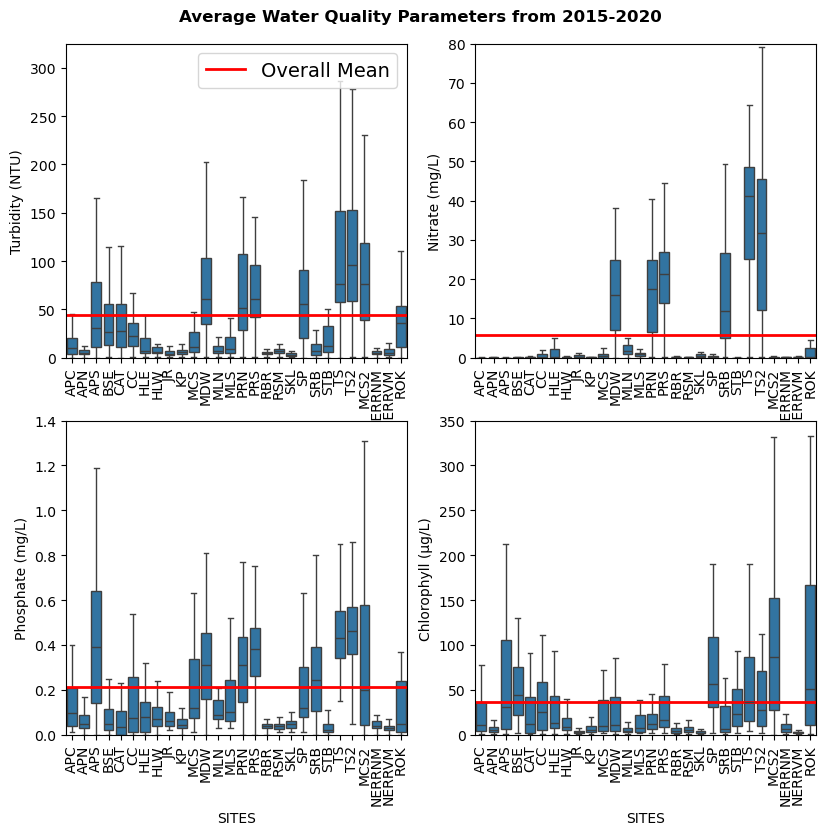

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(8.5, 8))

#I think sns has better box plot so i used it.

sns.boxplot(x=df_range['ESNERR_StCode'], y='Turb (NTU)', data=df_range, ax=axes[0, 0], flierprops=dict(marker='', color='white', markersize=0)) 
axes[0, 0].set_ylabel('Turbidity (NTU)')
axes[0, 0].set_ylim(0, 325) #Depending on range set the limits
axes[0, 0].axhline(y=mean_turbidity, color='red', linestyle='-', linewidth=2, label='Overall Mean')#Mean line

sns.boxplot(x=df_range['ESNERR_StCode'], y='MLML Nitrate mg/L', data=df_range, ax=axes[0, 1], flierprops=dict(marker='', color='white', markersize=0)) 
axes[0, 1].set_ylabel('Nitrate (mg/L)')
axes[0, 1].set_ylim(0, 80) 
axes[0, 1].axhline(y=mean_nitrate, color='red', linestyle='-', linewidth=2, label='Overall Mean')

sns.boxplot(x=df_range['ESNERR_StCode'], y='MCCL Phosphate (mg/L)', data=df_range, ax=axes[1, 0], flierprops=dict(marker='', color='white', markersize=0)) 
axes[1, 0].set_xlabel('SITES')
axes[1, 0].set_ylabel('Phosphate (mg/L)')
axes[1, 0].set_ylim(0, 1.4)
axes[1, 0].axhline(y=mean_phos, color='red', linestyle='-', linewidth=2, label='Overall Mean')

sns.boxplot(x=df_range['ESNERR_StCode'], y='Lab Chl a (ug/L)', data=df_range, ax=axes[1, 1], flierprops=dict(marker='', color='white', markersize=0)) 
axes[1, 1].set_xlabel('SITES')
axes[1, 1].set_ylabel('Chlorophyll (μg/L)')
axes[1, 1].set_ylim(0, 350)
axes[1, 1].axhline(y=mean_chl, color='red', linestyle='-', linewidth=2, label='Overall Mean')


fig.suptitle('Average Water Quality Parameters from 2015-2020', fontsize=12, fontweight='bold') 

plt.tight_layout()  
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=90)
plt.subplots_adjust(hspace=.20, wspace=0.2) 

axes[0, 0].legend(loc='upper right', fontsize=14)#Move or adjust legend

#plt.savefig("ES_avgs_2015-20", bbox_inches='tight', dpi=300)
plt.show()

**Figure 7:** The plot shows the average A) Turbidity (NTU), B) nitrate (mg/L), C) Phosphate (mg/L), and D) Chlorophyll a (μg/L) measurements of each site of the System Wide Monitoring Program (SWMP) from 2015-2020. The overall mean of A) 44.57 (NTU), B) 5.95 (mg/L), C) 0.32 (mg/L), D) 36.72  (mg/L) from 2015-2020 is shown with a solid red line.

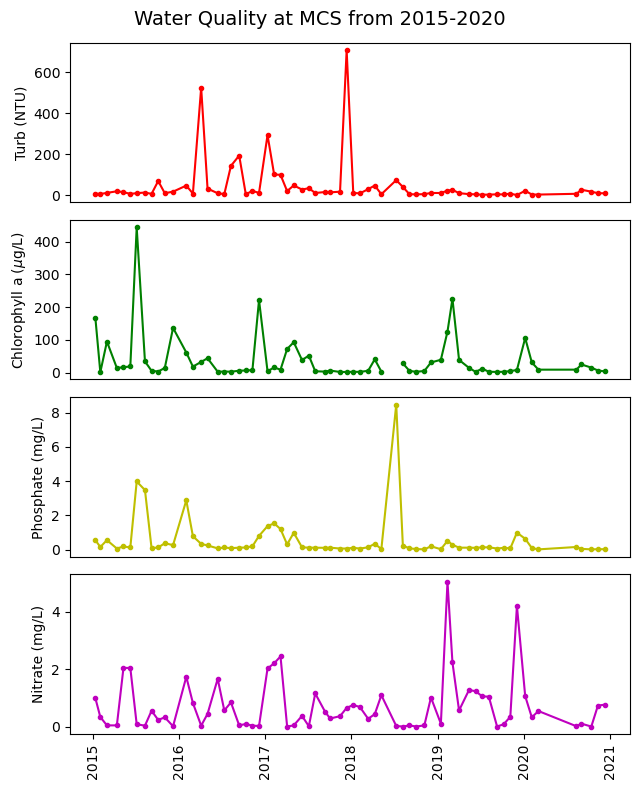

In [61]:
plt.figure(figsize=(6.5, 8)) 
plt.subplot(4,1,1)
plt.plot(df_range[df_range['ESNERR_StCode'] == 'MCS']['Date'], df_range[df_range['ESNERR_StCode'] == 'MCS']['Turb (NTU)'],'r.-')
plt.xticks([]) 
plt.ylabel('Turb (NTU)')

plt.subplot(4,1,2)
plt.plot(df_range[df_range['ESNERR_StCode'] == 'MCS']['Date'], df_range[df_range['ESNERR_StCode'] == 'MCS']['Lab Chl a (ug/L)'], 'g.-')
plt.xticks([]) 
plt.ylabel('Chlorophyll a ($\\mu$g/L)')

plt.subplot(4,1,3)
plt.plot(df_range[df_range['ESNERR_StCode'] == 'MCS']['Date'], df_range[df_range['ESNERR_StCode'] == 'MCS']['MCCL Phosphate (mg/L)'], 'y.-')
plt.xticks([]) 
plt.ylabel('Phosphate (mg/L)')

plt.subplot(4,1,4)
plt.plot(df_range[df_range['ESNERR_StCode'] == 'MCS']['Date'], df_range[df_range['ESNERR_StCode'] == 'MCS']['MLML Nitrate mg/L'], 'm.-')
plt.xticks(rotation=90) 
plt.ylabel('Nitrate (mg/L)')

plt.suptitle('Water Quality at MCS from 2015-2020', fontsize=14)
plt.tight_layout()

#plt.savefig("MCS.png", bbox_inches='tight', dpi=300)
plt.show()

**Figure 8:** Chlrophyll *a* [ug/L] (green), turbidity [NTU] (red), phosphate [mg/L] (yellow), and nitrate [mg/L] (purple) of Moro Cojo Slough (MCS) from 2015-2020.

### <ins>RESULTS</ins>
**Raw Data Analysis:**

The ESNERR .csv data set is loaded and placed into a data frame (df). The data was formatted into float values and NaN values were added to empty cells using a function called “data_cleaner”.  Time is formatted to a datetime64[ns]. 

The raw data time for the water parameters of Elkhorn Slough ranges from 1989-2023. The raw data analysis for in lab chlorophyll a (ug/L), turbidity (NTU), in lab phosphate (mg/L), and in lab nitrate (mg/L) are graphed **(Figure 2)**. In lab chlorophyll a data did not start until 2008 with most of the values being added as 0, potentially from human error. For nitrate, Monterey County measured nitrate using two separate methods for fresh and marine water until 2008. From 2008 to present day, the Moss Landing Marina Laboratories nutrient lab would measure nitrate and chlorophyll a. To see variation over time the Kirby Park (KP) site was chosen for the raw analysis for its central location in Elkhorn Slough encompassing both fresh and saltwater systems.

Using the recommended EPA standards, each water parameter was compared to get a visual estimate. The EPA ranges for estuarine/freshwater systems are 10-30 NTU (turbidity), <0.01 mg/L (phosphate), <1.0 mg/L (nitrate), and <40 ug/L (chlorophyll a). The historic data of Kirby Park shows above average values for all four graphed parameters **(Figure 2)**.

**PCA:**

Originally a PCA was created for each of the ~30 sites as column values with dates on the rows. Each matrix would compare a water parameter from 1989-2023. However, due to the number of sites, it made the visual PCA convoluted and difficult to understand. In addition, the in-lab measurements of nitrate and chlorophyll a were not measured until 2008, so a PCA for turbidity and phosphate was created. The alternative was to create a PCA showing regional differences for turbidity and salinity from 1989-2023 **(Figure 3&5)**.

PCA analysis of turbidity show a positive factor loading, grouping certain regions together **(Figure 3)**. The Salinas River and upper slough show a positive grouping for PC1 and a negative loading for PC2. The cumulative variance for PC1 and PC2 loading was 23.23% and 18.69 respectively with an overall 41.92%. The PCA scores show a positive correlation on the PC1 axis **(Figure 4)**.

PCA analysis of phosphate show a positive factor loading grouping certain regions together **(Figure 5)**. The Salinas River and upper slough show a positive grouping for PC1 and a negative loading for PC2. The cumulative variance for PC1 and PC2 loading was 22.53% and 12.19% respectively with an overall 34.72%. The PCA scores show a positive and negative correlation on the PC1 axis **(Figure 6)**.

The PCA analysis of both salinity and phosphate of the data show very similar groupings. The Salinas River and upper slough regions are on opposite ends of Elkhorn Slough, but are structured similarly, potentially from the freshwater inputs inland.

**2015-2020 Subset:**

A subset of the raw ESNERR data was created to show recent developments in water quality parameters. The time range also includes an El Nino year (2015-2016) to see its impact on water quality. The averages for turbidity, nitrate, phosphate, and chlorophyll are graphed for each site from 2015-2020 **(Figure7)**. The overall average is added as a red line to see which sites were higher than most.

MCS site was chosen for its location at the end of the Salinas River before entering Elkhorn Slough **(Figure 1)**. Turbidity, chlorophyll, phosphate, and nitrate levels of MCS are graphed to compare the fluctuation of each parameter **(Figure 8)**. The highest chlorophyll concentrations were during the 2015-2016 El Nino. Data shows chlorophyll biomass being tied to eutrophic conditions. High nitrate values are not comparable to chlorophyll biomass unlike phosphate.

## <ins>CONCLUSION</ins>

Both regions and sites of Elkhorn Slough are structured differently with water parameters playing a big role. KP raw data graphs gives us an idea that the region experiences high pulses of nutrients brought in by rain. The PCA analysis of both salinity and phosphate of the data show very similar groupings with regions. Even though, Salinas River and upper slough regions are on opposite ends of Elkhorn Slough, their similarities could be from their close location to fresh water and agricultural sources. 
	
Subset data of 2015-2020 show sites within the Moro Cojo/Salinas River having above average turbidity, phosphate, nitrate, and chlorophyll a. This is probably due to the agricultural run-off from the nearby farmland brought in by rain. Subset data for MCS tells us that blooms are brought by a combination of high nitrate and phosphate. The highest spike in chlorophyll was during an El Nino year where high nutrient water could have been flushed in the slough causing a bloom. The results indicate phosphate is a limiting nutrient in this site as large spikes in nitrate did not have comparable change to chlorophyll. The combination of fresh water and seawater creates a two distinctly different groups: hyper eutrophic freshwater sites and less eutrophic seawater sites. 



## <ins>FUTURE WORK</ins>
The data set is quite old with multiple different people curating it over the decades it wouldn’t be a surprise if there are some miscalculations or forgotten data points caused by human error. Cleaning the data in the future and figuring out areas of error is a future goal. Understanding the consistency of the protocols and where changes have been made is an important part.

Additional future work will include the incorporation of genetic biodiversity data and colored dissolved organic matter as part of my thesis analysis. Combining water quality data and microbial community composition will require additional analysis and can shows important parameters structuring Elkhorn Slough. This large dataset provides important historical data that future researchers can use.


## <ins>REFERENCES</ins>

Hicks, K. 2019. Long-term trends and spatial patterns of water quality in estuarine wetlands of central California.

McLusky, D. S., and M. Elliott. 2004. The Estuarine Ecosystem, Oxford University Press.

Nidzieko, N. J., and S. G. Monismith. 2013. Contrasting Seasonal and Fortnightly Variations in the Circulation of a Seasonally Inverse Estuary, Elkhorn Slough, California. Estuaries and Coasts 36: 1–17. doi:10.1007/s12237-012-9548-1

W. Broenkow, W., and L. C. Breaker. 2020. A 30-Year History of the Tides and Currents in Elkhorn Slough, California, In J. Pan and A. Devlin [eds.], Estuaries and Coastal Zones - Dynamics and Response to Environmental Changes. IntechOpen.

Wasson, K. and others. 2015. Lessons learned from an ecosystem-based management approach to restoration of a California estuary. Marine Policy 58: 60–70. doi:10.1016/j.marpol.2015.04.002